# 1. Introduction

We have behavioral data on the credit card usage of customers.

# 2. Focus

We want to focus on grouping these customers by behaviorial traits so that info can be shared with the other business teams to target the groups for marketing purposes, etc.

# 3. Data

The data comes from [Kaggle](https://www.kaggle.com/arjunbhasin2013/ccdata) and contains 8,950 customers and 18 variables.

There are 314 missing values, those records will be dropped since it's a small portion of the total customers.

Data dictionary
* CUSTID : Identification of Credit Card holder (Categorical)
* BALANCE : Balance amount left in their account to make purchases (
* BALANCEFREQUENCY : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
* PURCHASES : Amount of purchases made from account
* ONEOFFPURCHASES : Maximum purchase amount done in one-go
* INSTALLMENTSPURCHASES : Amount of purchase done in installment
* CASHADVANCE : Cash in advance given by the user
* PURCHASESFREQUENCY : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
* ONEOFFPURCHASESFREQUENCY : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
* PURCHASESINSTALLMENTSFREQUENCY : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
* CASHADVANCEFREQUENCY : How frequently the cash in advance being paid
* CASHADVANCETRX : Number of Transactions made with "Cash in Advanced"
* PURCHASESTRX : Numbe of purchase transactions made
* CREDITLIMIT : Limit of Credit Card for user
* PAYMENTS : Amount of Payment done by user
* MINIMUM_PAYMENTS : Minimum amount of payments made by user
* PRCFULLPAYMENT : Percent of full payment paid by user
* TENURE : Tenure of credit card service for user

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ccdata/CC GENERAL.csv


In [2]:
raw = pd.read_csv('/kaggle/input/ccdata/CC GENERAL.csv')
raw.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [3]:
raw.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [4]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [5]:
# Check for missing values
raw.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [6]:
# Convert column headers to lowercase for ease of coding
raw.columns = raw.columns.str.lower()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  after removing the cwd from sys.path.


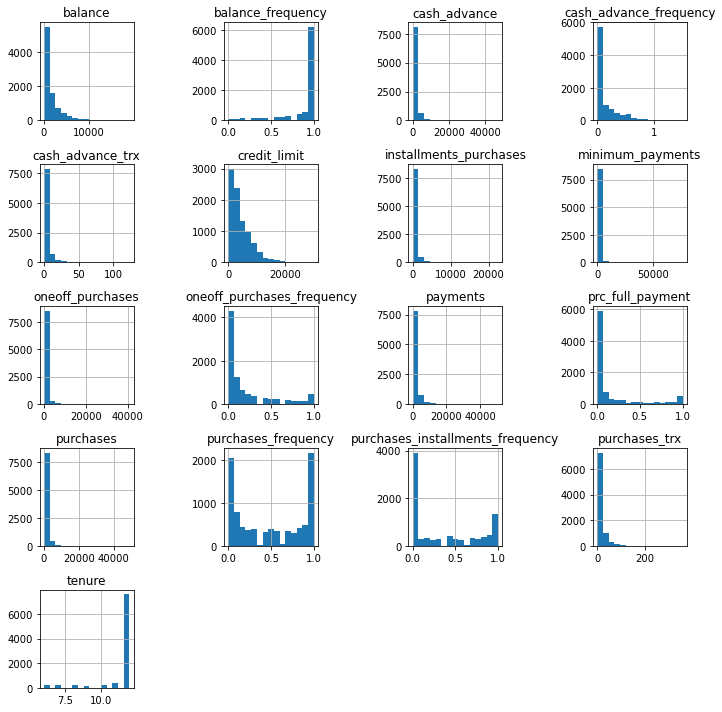

In [7]:
# Histograms of all features
fig = plt.figure(figsize = (10,10))
ax = fig.gca()
raw.hist(ax=ax, bins=15)
plt.tight_layout()

The histograms are non-normal,they'll be transformed in the Data section of this notebook.

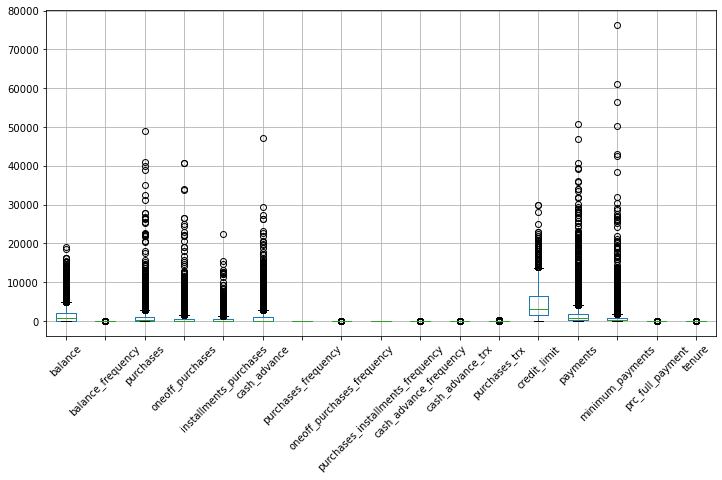

In [8]:
# Boxplots
raw.boxplot(figsize=(12,6), rot=45)

In [9]:
# check correlations
correlations = raw.corr()

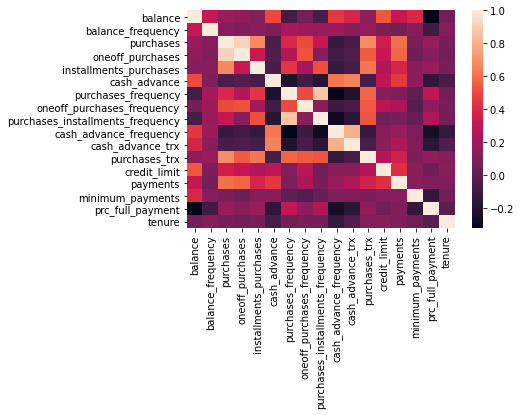

In [10]:
# Visualize correlations using a heatmap
ax = sns.heatmap(correlations)
#ax = sns.heatmap(correlations, annot=True, fmt='.1f')

From the visual, there's some correlation between payments vs purchases and transactions vs frequency.  But nothing obvious to cluster groups.

# 4. Methods

In [11]:
# drop records with NA
df = raw.dropna()

In [12]:
# Also drop cust_id, not needed for models
X=df.drop(['cust_id'], axis=1)
X.head()

,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.00,0,12,7500.0,622.066742,627.284787,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.00,0,1,1200.0,678.334763,244.791237,0.000000,12
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.00,0,8,1800.0,1400.057770,2407.246035,0.000000,12


In [18]:
# Data is non-normal, run transformation (could also try Box-Cox)
from scipy.stats.mstats import winsorize
# first winsorize to limit extreme values
Xwins = winsorize(X)
#transform
Xtr = pd.DataFrame(np.log1p(Xwins), columns=X.columns)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  after removing the cwd from sys.path.


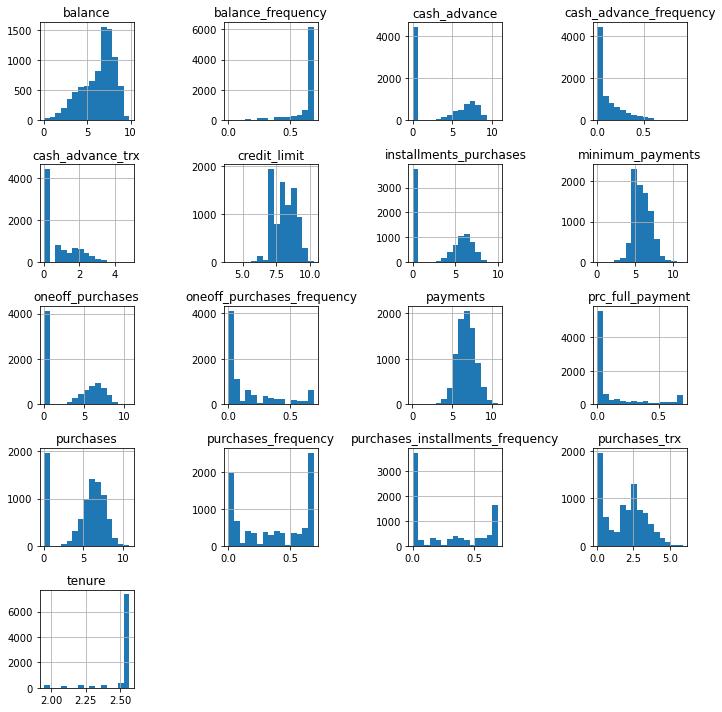

In [19]:
# Check the histograms of all features
fig = plt.figure(figsize = (10,10))
ax = fig.gca()
Xtr.hist(ax=ax, bins=15)
plt.tight_layout()

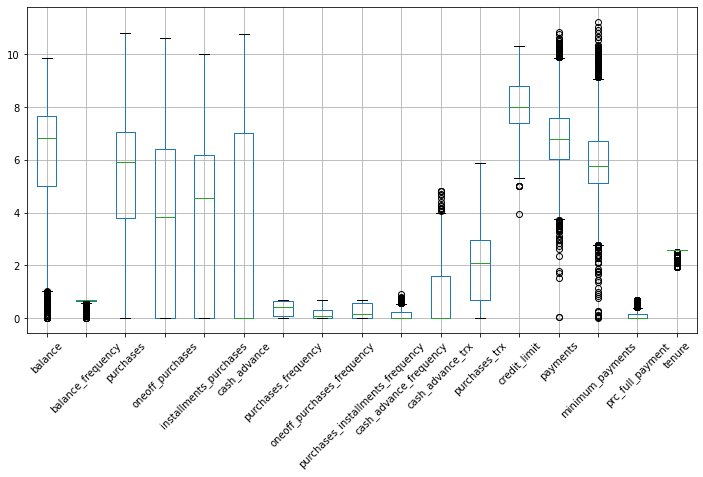

In [37]:
# Boxplots
Xtr.boxplot(figsize=(12,6), rot=45)

### Define utility functions

In [20]:
# === taken from
# == https://stackoverflow.com/questions/39216897/plot-pca-loadings-and-loading-in-biplot-in-sklearn-like-rs-autoplot
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# In general, it's a good idea to scale the data prior to PCA.
def normalize(X):
    # Get column names first
    names = X.columns
    scaler = StandardScaler()
    X = scaler.fit_transform(X)
    return pd.DataFrame(X, columns=names)

def principle_components(X):
    pca = PCA()
    x_new = pca.fit_transform(X)
    return x_new, pca

def biplot(score,coeff,y,title, labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley, c = y)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'black', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'black', ha = 'center', va = 'center')
    plt.xlim(-0.6,0.6)
    plt.ylim(-0.6,0.6)
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.title(title)
    plt.grid()

In [21]:
# Create normalized dataset
Xtr_norm = normalize(Xtr)

In [22]:
Xnorm.columns

Index(['balance', 'balance_frequency', 'purchases', 'oneoff_purchases',
       'installments_purchases', 'cash_advance', 'purchases_frequency',
       'oneoff_purchases_frequency', 'purchases_installments_frequency',
       'cash_advance_frequency', 'cash_advance_trx', 'purchases_trx',
       'credit_limit', 'payments', 'minimum_payments', 'prc_full_payment',
       'tenure'],
      dtype='object')

In [23]:
# use abbreviations for the columns so labelled plots are easier to read
abbr = ['b', 'bf', 'p', 'op', 'ip', 'ca', 'pf', 'opf', 'ipf',
        'caf', 'cat', 'pt', 'cl', 'py', 'mpy','%py', 't' ]
Xnorm.columns = abbr

Unsupervised models will be applied to the data with # of classes varied and then the resulting data will be reviewed.

In [24]:
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.decomposition import PCA
from sklearn import datasets, metrics

## a. KMeans 

In [25]:
# Dataset not transformed
# First get silhouette score to help determine # of clusters
cluster_numbers = [2, 3, 4, 5, 6]
kmeans_scores = []
for i in cluster_numbers:
    k_means = KMeans(n_clusters=i, random_state=123)
    model = k_means.fit_predict(Xnorm)
    score = metrics.silhouette_score(Xnorm, model, metric='euclidean')
    kmeans_scores.append(score)
    print('clusters {}, silhouette score: {:.3f}'.format(i,score) )

clusters 2, silhouette score: 0.208
clusters 3, silhouette score: 0.248
clusters 4, silhouette score: 0.197
clusters 5, silhouette score: 0.192
clusters 6, silhouette score: 0.207


In [26]:
# Transformed Dataset
# First get silhouette score to help determine # of clusters
cluster_numbers = [2, 3, 4, 5, 6]
kmeans_scores_tr = []
for i in cluster_numbers:
    k_means = KMeans(n_clusters=i, random_state=123)
    model = k_means.fit_predict(Xtr_norm)
    score = metrics.silhouette_score(Xtr_norm, model, metric='euclidean')
    kmeans_scores_tr.append(score)
    print('clusters {}, silhouette score: {:.3f}'.format(i,score) )

clusters 2, silhouette score: 0.260
clusters 3, silhouette score: 0.232
clusters 4, silhouette score: 0.219
clusters 5, silhouette score: 0.227
clusters 6, silhouette score: 0.227


Text(0.5, 1.0, 'KMeans silhouette score')

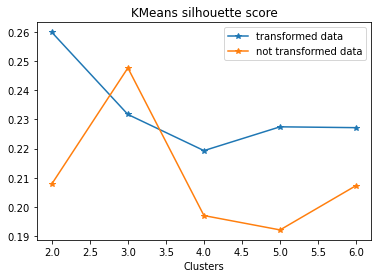

In [27]:
# graph of k-means scores
cluster_numbers = [2, 3, 4, 5, 6]
df_score = pd.DataFrame({'transformed data':kmeans_scores_tr,
                'not transformed data':kmeans_scores}, index = cluster_numbers)
df_score.plot(marker='*')
plt.xlabel('Clusters')
plt.title('KMeans silhouette score')

Do further analysis on 2, 3, 4 clusters with the data transformed.  Above 4 the score doesn't change.

In [28]:
# Check pca
x_new, pca = principle_components(Xtr_norm)
print(pca.explained_variance_ratio_)

[0.3473001  0.22415275 0.09591753 0.07681046 0.06848134 0.04368109
 0.04194168 0.03034052 0.02082976 0.01478311 0.01017272 0.00809595
 0.00583618 0.00510397 0.00271924 0.00237101 0.0014626 ]


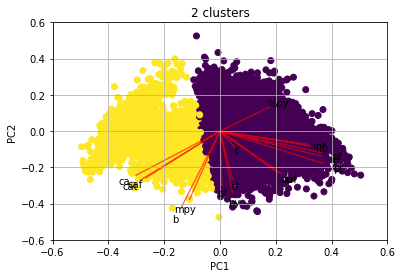

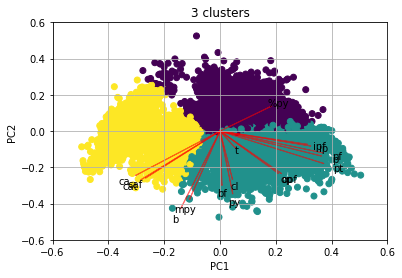

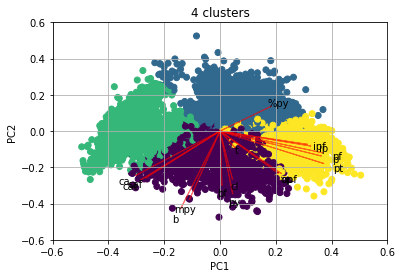

In [30]:
# Fit the clusters (transformed)
cluster_numbers = [2, 3, 4]
kmeans_models_tr = []


for k in cluster_numbers:
    k_means = KMeans(n_clusters=k, random_state=123)
    model = k_means.fit(Xtr_norm)
    kmeans_models_tr.append(model)
    y = model.labels_
    title = '{} clusters'.format(k)
    biplot(x_new[:,0:2],np.transpose(pca.components_[0:2, :]),y,title,Xnorm.columns)
    plt.show()

By visual inspection,
2 clusters fall into those with a cash advance and rest of members

3 clusters separates those with a low current limit and low payment/balance amounts

4 clusters gives the following 4 groups: cash advance/high balance, low credit limit, high purchase freq/transactions, rest of customers

In [31]:
# class counts for 4 clusters
pd.Series(kmeans_models[2].labels_).value_counts()


0    3805
3    3281
2    1156
1     394
dtype: int64

In [32]:
# another method to analyze the clusters, non-graphical
for model in kmeans_models:
    X['clusters'] = model.labels_
    print(X.groupby(['clusters']).mean().transpose() )
X.drop(['clusters'], axis=1);

clusters                                    0            1
balance                           1379.109708  1764.287767
balance_frequency                    0.952934     0.852530
purchases                         2040.460077   280.266044
oneoff_purchases                  1151.785875   203.413586
installments_purchases             889.009127    77.146060
cash_advance                       426.499557  1410.927196
purchases_frequency                  0.904100     0.196399
oneoff_purchases_frequency           0.363061     0.090538
purchases_installments_frequency     0.730076     0.103610
cash_advance_frequency               0.058180     0.195912
cash_advance_trx                     1.393600     4.723695
purchases_trx                       30.847101     3.423695
credit_limit                      5102.070638  4096.306803
payments                          2199.201068  1480.014812
minimum_payments                   869.067077   860.808886
prc_full_payment                     0.274189     0.0749

The biplot is much easier to determine groups vs looking at the means of the features.

## b. GMM

In [33]:
from sklearn.mixture import GaussianMixture

In [34]:
# Defining the agglomerative clustering
def gmm_results(X, n_components=3, random_state=123, covariance_types=None):
    if not covariance_types:
        covariance_types = ['full', 'tied', 'diag']
    if not isinstance(covariance_types, list):
        covariance_types = [covariance_types]
    # if checking different covariance types, return best model
    min_score = -10
    best_model_y = None
    for type in covariance_types:
        gmm_cluster = GaussianMixture(n_components=n_components, 
                                  random_state=random_state, covariance_type=type)
        y = gmm_cluster.fit_predict(X)
        score = metrics.silhouette_score(X, y, metric='euclidean')
        print(type,'score:', score)
        if score > min_score:
            min_score = score
            best_model_y = y
    return best_model_y

== 2 clusters
full score: 0.21765152346422
tied score: 0.23602496215984378
diag score: 0.2178023457216443


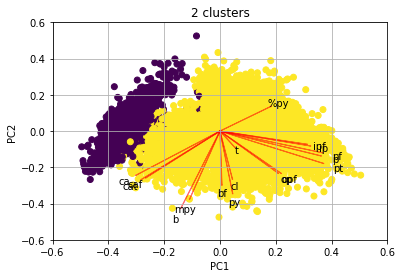

== 3 clusters
full score: 0.1740566031468631
tied score: 0.15319324185297273
diag score: 0.20300891632160772


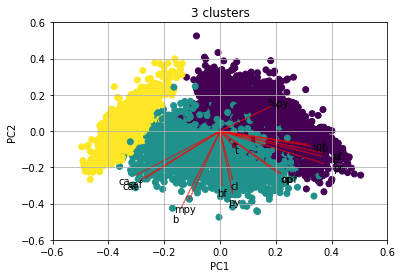

== 4 clusters
full score: 0.17596741413113326
tied score: 0.18608970734111277
diag score: 0.19515045927950742


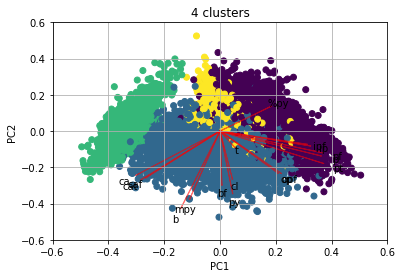

In [36]:
# Transformed dataset
cluster_numbers = [2, 3, 4]
for k in cluster_numbers:
    print('==',k, 'clusters')
    y = gmm_results(Xtr_norm, k)
    title = '{} clusters'.format(k)
    biplot(x_new[:,0:2],np.transpose(pca.components_[0:2, :]),y,title,Xnorm.columns)
    plt.show()

The GMM using transformed features results in clusters that are difficult to interpret and relatively lower scores than the other models.

# 5. Results

Based on the biplots and the silhouette scores, 4 customer groups can be clustered from the credit card dataset.
1. Those who have a cash advance/high balance
2. Those with a low credit limit
3. Those with a high purchase freq/transactions
4. Rest of customers

The Kmeans model performed better than GMM for this set based on the silhouette score.

# 6. Discussion and Recommendation

Customers are now grouped and the number of customers per group is known.
Other business units can act on those groups for their specific purpose, for example:

The cash advance/high balance group can be reviewed by risk control.

The low credit limit can be reviewed to see if the limit on some customers can be increased.

The high purchase freq/transactions group can be reviewed for the appropriate current limit and could be offered other products.


As a next step, instead of 4 groups (which was chosen from looking at the score vs clustes graph), a larger segmentation (for example 5 or 6 groups) may still be useful and would be an item for further investigation.  DBSCAN could be used to help identify how many groups to use.